<a href="https://colab.research.google.com/github/samgarcia3/Auto-MPG-Analysis/blob/main/Auto_mpg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Auto MPG DataSet

## Data Dictionary

- **mpg** - Miles Per Gallon. *(Continuous)*
- **cylinders** - Count of how many cylinders the vehicle contains. *(multi-valued discrete)*
- **displacement** - The measure of the cylinder volume swept by all of the pistons of a piston engine, excluding the combustion chambers.*(Continuous)*
- **horsepower** - Unit of power equal to 550 foot-pounds per second (745.7 watts)*(Continuous)*
- **weight** - Weight of the vehicle.*(Continuous)*
- **acceleration** - Capacity to gain speed within a short time.*(Continuous)*
- **model year** - The year in which the vehicle was manufacured. *(multi-valued discrete)*
- **origin** - [Manufacturers Certificate of Origin](https://en.wikipedia.org/wiki/Manufacturer%27s_Certificate_of_Origin) is a specified document certifying the country of origin of the merchandise required by certain foreign countries for tariff purposes. It sometimes requires the signature of the consulate of the country to which it is destined.*(multi-valued discrete)*
- **car name** - Vehicle class/type/name given by the manufacturer.*(string)*



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats

In [2]:
from google.colab import files
data_to_load = files.upload()

Saving auto-mpg.csv to auto-mpg.csv


In [3]:
import io
mpg_df = pd.read_csv(io.BytesIO(data_to_load['auto-mpg.csv']))

In [4]:
mpg_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [5]:
mpg_df.shape

(398, 9)

## Data Cleaning


In [6]:
clean_mpg = mpg_df.copy()
clean_mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


**Duplicates**


In [7]:
# check for duplicate rows
duplicate_indicator = clean_mpg.duplicated()

In [8]:
# these rows have duplicates in the data
clean_mpg.loc[duplicate_indicator, :]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name


In [9]:
duplicate_indicator.sum()/duplicate_indicator.shape[0]*100

0.0

The dataset does not contain any duplicates

**Missing Values**
<br>

Next we check the table for completeness and see if any data is missing. We present the per-columns fraction of missing values below:

In [10]:
missing_fraction = clean_mpg.isna().sum()/clean_mpg.shape[0]*100
missing_fraction

mpg             0.0
cylinders       0.0
displacement    0.0
horsepower      0.0
weight          0.0
acceleration    0.0
model year      0.0
origin          0.0
car name        0.0
dtype: float64

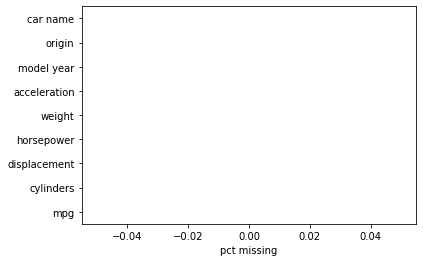

In [11]:
# plot the misssing values
missing_fraction.plot(kind="barh")# histogram
plt.xlabel("pct missing");# label missing categories

#EDA

Let's go ahead and check what kind of data types this dataset contains.

In [12]:
# Check the data types 
clean_mpg.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

**Statistics**

In [13]:
# Check any interesting statistics
clean_mpg.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


ToDo:

- Convert data types
- Create New Features
- Combine Features
- Remove Features?


**Converting Data Types**

In [14]:
clean_mpg.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

**`?`** Value

In [15]:
clean_mpg = clean_mpg[clean_mpg.horsepower != '?']

In [16]:
clean_mpg.shape

(392, 9)

In [17]:
clean_mpg.horsepower = clean_mpg.horsepower.astype('float')
clean_mpg.dtypes

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [18]:
clean_mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


As we can see, our new description for the dataset has changed. It now includes horsepower and the statistics have changed slightly. This is a good sign and we are on the right track.

## Insider Looks



**MPG**

In [19]:
clean_mpg.mpg.describe()

count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

*Note: Min = 9, Max = 46, Mean = 23.44, Variation = 7.8*

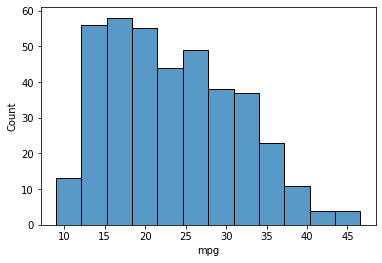

In [20]:
sns.histplot(clean_mpg['mpg'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


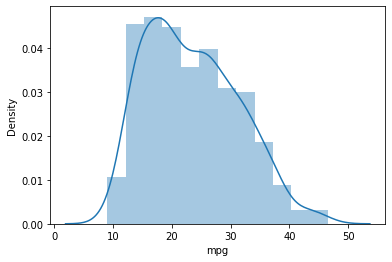

In [21]:
sns.distplot(clean_mpg['mpg'])

In [22]:
print("Skewness: %f" % clean_mpg['mpg'].skew())
print("Kurtosis: %f" % clean_mpg['mpg'].kurt())

Skewness: 0.457092
Kurtosis: -0.515993


**Skewness** -`0.45`- In probability theory and statistics, skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. The skewness value can be positive, zero, negative, or undefined.
<br>

**Kurtosis** - `-0.51` - the sharpness of the peak of a frequency-distribution curve.

## Scaling

<br>

We will now scale the data to better evaluate and visualize the relathionships between features

In [23]:
def scale(a):
    b = (a-a.min())/(a.max()-a.min())
    return b

In [24]:
scaled_mpg = clean_mpg.copy

In [25]:
data_scale = clean_mpg.copy()

In [26]:
data_scale ['displacement'] = scale(data_scale['displacement'])
data_scale['horsepower'] = scale(data_scale['horsepower'])
data_scale ['acceleration'] = scale(data_scale['acceleration'])
data_scale ['weight'] = scale(data_scale['weight'])
data_scale['mpg'] = scale(data_scale['mpg'])

In [27]:
data_scale.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,0.239362,8,0.617571,0.456522,0.536150,0.238095,70,1,chevrolet chevelle malibu
1,0.159574,8,0.728682,0.646739,0.589736,0.208333,70,1,buick skylark 320
2,0.239362,8,0.645995,0.565217,0.516870,0.178571,70,1,plymouth satellite
3,0.186170,8,0.609819,0.565217,0.516019,0.238095,70,1,amc rebel sst
4,0.212766,8,0.604651,0.510870,0.520556,0.148810,70,1,ford torino


In [28]:
clean_mpg['Country_code'] = clean_mpg['origin'].replace({1:'USA', 2:'Europe', 3:'Japan'})
data_scale['Country_code'] = clean_mpg.origin.replace({1:'USA', 2:'Europe', 3:'Japan'})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
clean_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,Country_code
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,USA
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,USA
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,USA
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,USA
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,USA


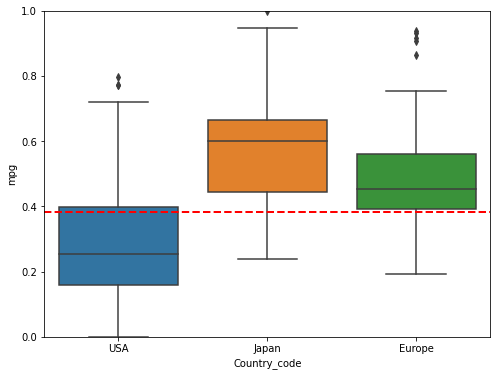

In [30]:
var = 'Country_code'
data_plt = pd.concat([data_scale['mpg'], data_scale[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="mpg", data=data_plt)
fig.axis(ymin=0, ymax=1)
plt.axhline(data_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)


**Model Year**

In [31]:
# Print value counts
print(clean_mpg['model year'].value_counts())

73    40
78    36
76    34
82    30
75    30
79    29
70    29
81    28
77    28
72    28
80    27
71    27
74    26
Name: model year, dtype: int64


**Car Name**

In [32]:
# Print value counts
print(clean_mpg['car name'].value_counts())

amc matador                  5
ford pinto                   5
toyota corolla               5
chevrolet chevette           4
amc gremlin                  4
                            ..
amc pacer                    1
chrysler cordoba             1
toyota celica gt liftback    1
toyota carina                1
buick electra 225 custom     1
Name: car name, Length: 301, dtype: int64


**Origin**

In [33]:
# Print value counts
print(clean_mpg['origin'].value_counts())

1    245
3     79
2     68
Name: origin, dtype: int64


**Cylinders**

In [34]:
# Print value counts
print(clean_mpg['cylinders'].value_counts())

4    199
8    103
6     83
3      4
5      3
Name: cylinders, dtype: int64


In [35]:
clean_mpg_round = clean_mpg.round()
clean_mpg_round

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,Country_code
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,USA
1,15.0,8,350.0,165.0,3693,12.0,70,1,buick skylark 320,USA
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,USA
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,USA
4,17.0,8,302.0,140.0,3449,10.0,70,1,ford torino,USA
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,16.0,82,1,ford mustang gl,USA
394,44.0,4,97.0,52.0,2130,25.0,82,2,vw pickup,Europe
395,32.0,4,135.0,84.0,2295,12.0,82,1,dodge rampage,USA
396,28.0,4,120.0,79.0,2625,19.0,82,1,ford ranger,USA


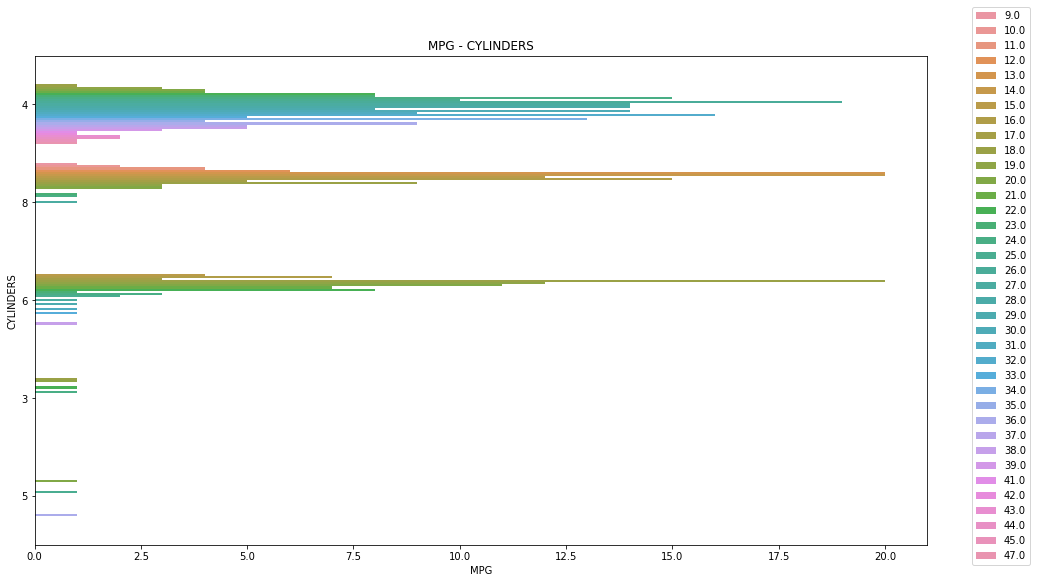

In [36]:
# set up 
sns.color_palette("rocket", as_cmap=True)
plt.figure(figsize=(16,9))
# Plot variables and color palette          
sns.countplot(y='cylinders', hue='mpg', data=clean_mpg_round,
              order=clean_mpg_round.cylinders.value_counts().index)# retrieve top 10 counts
# title        
plt.title("MPG - CYLINDERS")
plt.xlabel("MPG")
plt.ylabel("CYLINDERS")

# place the legend outside the figure/plot
plt.legend(bbox_to_anchor=(1.05, 1.1), loc=2,
           borderaxespad=0.)

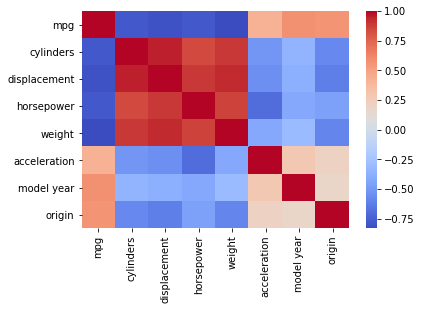

In [37]:
sns.heatmap(clean_mpg.corr(), cmap='coolwarm')
sns.heatmap;

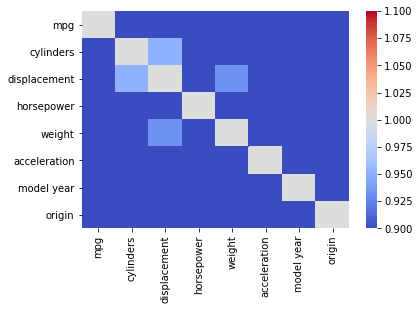

In [39]:
sns.heatmap(clean_mpg.corr(), vmin=1, cmap='coolwarm');
sns.heatmap;

In [40]:
clean_mpg.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name', 'Country_code'],
      dtype='object')

**Correlation Scatter Plots**
<br>

Weight & MPG

In [68]:
x = clean_mpg['weight']
y = clean_mpg['mpg']

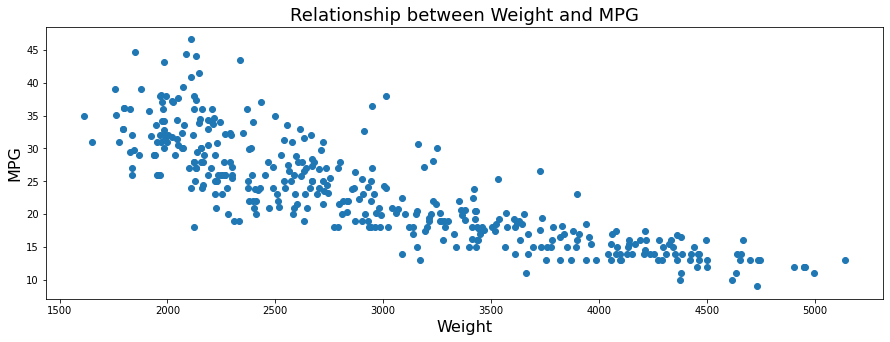

In [69]:
plt.figure(figsize=(15,5))
plt.scatter(x,y)
plt.xlabel("Weight", size=16)
plt.ylabel("MPG", size=16)
plt.title(r"Relationship between Weight and MPG", size=18)
plt.show()

Cylinders & MPG

In [70]:
x1 = clean_mpg['cylinders']
y = clean_mpg['mpg']

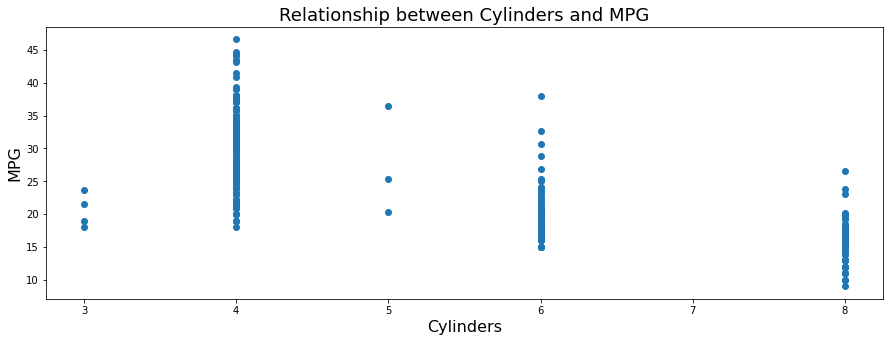

In [71]:
plt.figure(figsize=(15,5))
plt.scatter(x1,y)
plt.xlabel("Cylinders", size=16)
plt.ylabel("MPG", size=16)
plt.title(r"Relationship between Cylinders and MPG", size=18)
plt.show()

Horsepower and MPG

In [72]:
x2 = clean_mpg['horsepower']

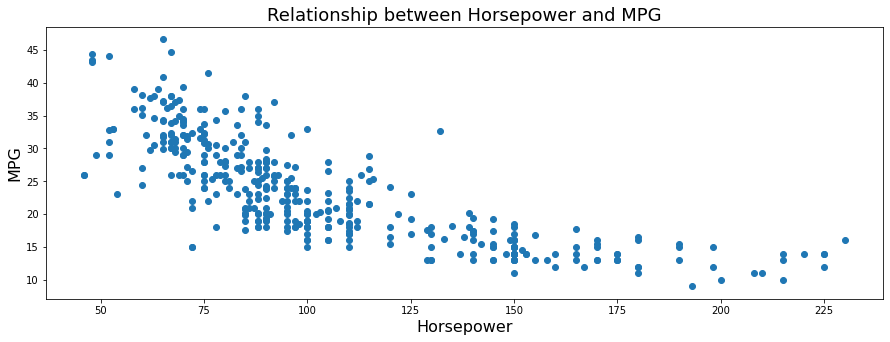

In [73]:
plt.figure(figsize=(15,5))
plt.scatter(x2,y)
plt.xlabel("Horsepower", size=16)
plt.ylabel("MPG", size=16)
plt.title(r"Relationship between Horsepower and MPG", size=18)
plt.show()

Model Year and MPG

In [74]:
x3 = clean_mpg['model year']

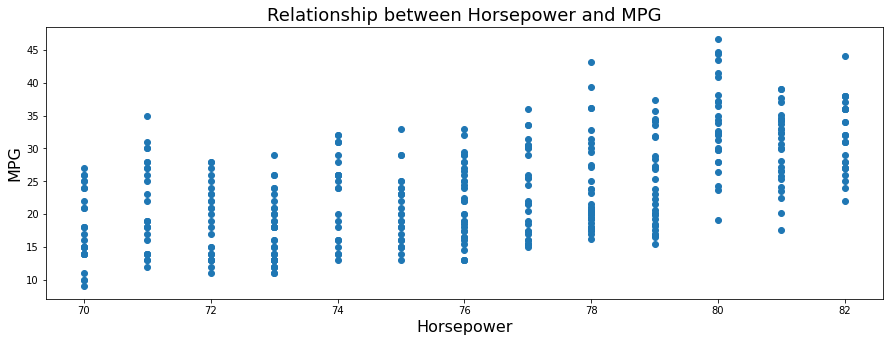

In [75]:
plt.figure(figsize=(15,5))
plt.scatter(x3,y)
plt.xlabel("Horsepower", size=16)
plt.ylabel("MPG", size=16)
plt.title(r"Relationship between Horsepower and MPG", size=18)
plt.show()

Displacement and MPG

In [76]:
x4 = clean_mpg['displacement']

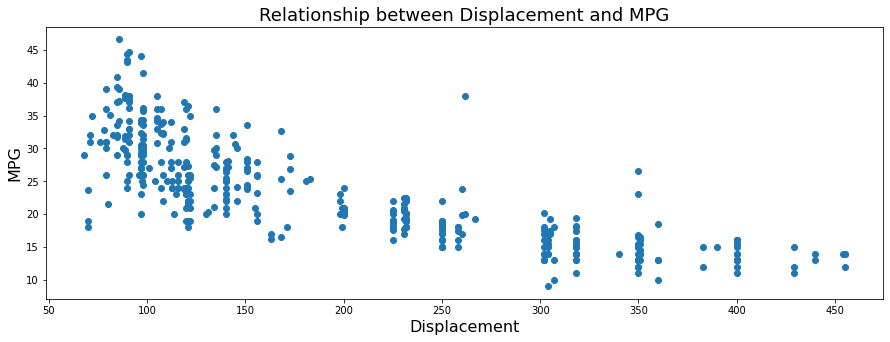

In [77]:
plt.figure(figsize=(15,5))
plt.scatter(x4,y)
plt.xlabel("Displacement", size=16)
plt.ylabel("MPG", size=16)
plt.title(r"Relationship between Displacement and MPG", size=18)
plt.show()